<h2 style="text-align: center;">Manipulating Time Series Data in Python</h2>

### CH01: Working with Time Series in Pandas

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

#### How to use dates & times with pandas

In [2]:
# Create the range of dates here
seven_days = pd.date_range(start = '2017-1-1', periods = 7)
seven_days


DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

In [3]:
# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


#### Indexing & resampling time series

-> Create a time series of air quality data

In [4]:
# air quality data
nyc_df = pd.read_csv('data/nyc.csv')
nyc_df.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035161,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [5]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB


In [6]:
# Convert the date column to datetime64
nyc_df['date'] = pd.to_datetime(nyc_df['date'])

In [7]:
# Set date column as index
nyc_df.set_index('date', inplace = True)

In [8]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB


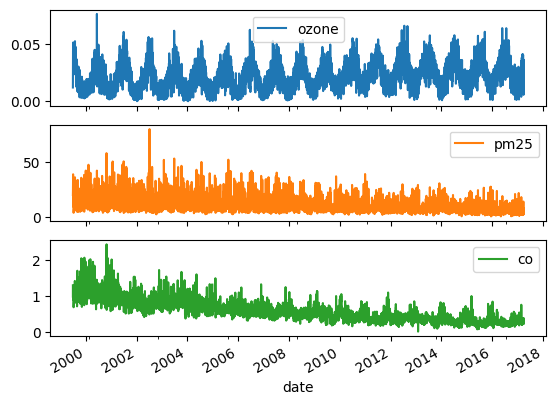

In [9]:
nyc_df.plot(subplots=True)
plt.show()

-> Compare annual stock price trends

In [10]:
yahoo_stock = pd.read_csv('data/yahoo.csv')
yahoo_stock.head()

,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66


In [11]:
# Ensure the date column is in datetime format and set it as the index
yahoo_stock['date'] = pd.to_datetime(yahoo_stock['date'])
yahoo_stock.set_index('date', inplace=True)

In [12]:
yahoo_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [13]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    # Use .loc[] to select the rows where the index year is equal to the year in the loop.
    # Select the price column and reset the index to get a DataFrame with a single column.
    # The index will be the date of the stock price.
    # Use the .reset_index() method to reset the index and drop the old index.
    price_per_year = yahoo_stock.loc[year, ['price']].reset_index(drop=True)
    
    # Rename the column 'price' to the year in the loop.
    # Use the .rename() method to rename the column 'price' to the year in the loop.
    # this will create a new column with the year as the name and the price as the value.
    price_per_year.rename(columns={'price': year}, inplace=True)

    # Concatenate the new DataFrame with the existing prices DataFrame.
    # Use the pd.concat() method to concatenate the new DataFrame with the existing prices DataFrame.
    # Use axis=1 to concatenate along the columns.
    prices = pd.concat([prices, price_per_year], axis=1)


In [14]:
prices.head()

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59


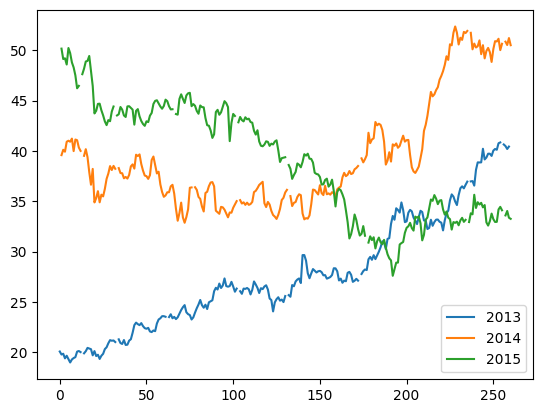

In [15]:
# Plot prices
prices.plot()
plt.show()

-> Set and change time series frequency

In [16]:
co_cities = pd.read_csv('data/co_cities.csv')
co_cities.head()

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761


In [17]:
co_cities['date'] = pd.to_datetime(co_cities['date'])
co_cities.set_index('date', inplace=True)
co_cities.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


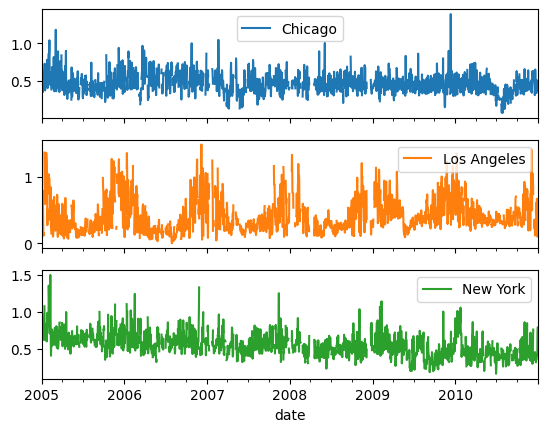

In [18]:
# Set the frequency to calendar daily
co_cities_d = co_cities.asfreq('D')

co_cities_d.plot(subplots=True)
plt.show()

C:\Users\alisa\AppData\Local\Temp\ipykernel_11500\1722690545.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  co_cities_m = co_cities.asfreq('M')


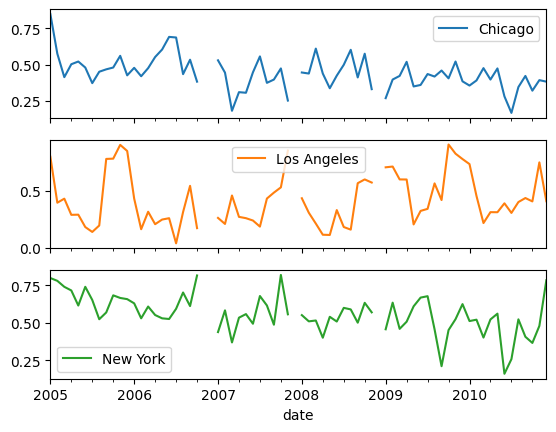

In [19]:
# Set frequency to monthly
co_cities_m = co_cities.asfreq('M')

co_cities_m.plot(subplots=True)
plt.show()

#### Lags, changes, and returns for stock price series

-> Shifting stock prices across time

In [20]:
# Read the Google stock data
# Read the CSV file and parse the 'Date' column as datetime
# Set the 'Date' column as the index
google_stock = pd.read_csv('data/google.csv', parse_dates=['Date'], index_col='Date')
google_stock.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [21]:
# Set data frequency to business daily
google_stock_d = google_stock.asfreq('B')

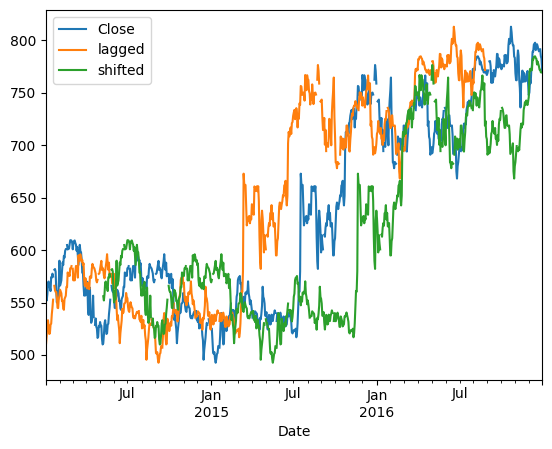

In [22]:

# Create 'lagged' and 'shifted'
google_stock_d['lagged'] = google_stock_d.Close.shift(-90)
google_stock_d['shifted'] = google_stock_d.Close.shift(90)

# Plot the google price series
google_stock_d.plot()
plt.show()

-> Calculating stock price changes

In [23]:
yahoo_stock = pd.read_csv('data/yahoo.csv', parse_dates=['date'], index_col='date')
yahoo_stock.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [24]:
yahoo_stock_B = yahoo_stock.asfreq('B')
yahoo_stock_B.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [25]:
# Created shifted_30 here
yahoo_stock_B['shifted_30'] = yahoo_stock_B.price.shift(30)

In [26]:
# Subtract shifted_30 from price
yahoo_stock_B['change_30'] = yahoo_stock_B.price.sub(yahoo_stock_B['shifted_30'])

In [27]:
# Get the 30-day price difference
yahoo_stock_B['diff_30'] = yahoo_stock_B.price.diff(30)

In [28]:
# Inspect the last five rows of price
yahoo_stock_B.tail(5)

,price,shifted_30,change_30,diff_30
date,,,,
2015-12-25,NaN,32.19,NaN,NaN
2015-12-28,33.60,32.94,0.66,0.66
2015-12-29,34.04,32.86,1.18,1.18
2015-12-30,33.37,32.98,0.39,0.39
2015-12-31,33.26,32.62,0.64,0.64


In [29]:
# Show the value_counts of the difference between change_30 and diff_30
print((yahoo_stock_B['diff_30'].sub(yahoo_stock_B['change_30'])).value_counts())

0.0    703
Name: count, dtype: int64


-> Plotting multi-period returns

In [30]:
google_stock = pd.read_csv('data/google.csv', parse_dates=['Date'], index_col='Date')
google_stock_d = google_stock.asfreq('D')

C:\Users\alisa\AppData\Local\Temp\ipykernel_11500\1389227090.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google_stock_d['daily_return'] = google_stock_d.Close.pct_change(periods = 1).mul(100)
C:\Users\alisa\AppData\Local\Temp\ipykernel_11500\1389227090.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google_stock_d['monthly_return'] = google_stock_d.Close.pct_change(periods = 30).mul(100)
C:\Users\alisa\AppData\Local\Temp\ipykernel_11500\1389227090.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill

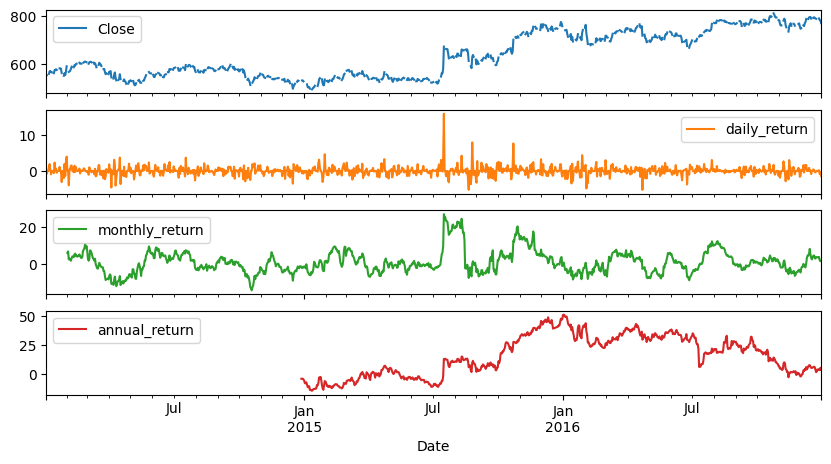

In [31]:
# Create daily_return
google_stock_d['daily_return'] = google_stock_d.Close.pct_change(periods = 1).mul(100)

# Create monthly_return
google_stock_d['monthly_return'] = google_stock_d.Close.pct_change(periods = 30).mul(100)

# Create annual_return
google_stock_d['annual_return'] = google_stock_d.Close.pct_change(periods = 360).mul(100)

# Plot the result
google_stock_d.plot(figsize=(10,5), subplots=True)
plt.show()

----------------
### CH02: Basic Time Series Metrics & Resampling

#### `>` Compare time series growth rates

-> Compare the performance of several asset classes

              SP500   Bonds     Gold    Oil
DATE                                       
2007-06-29  1503.35  402.15   648.50  70.47
2007-07-02  1519.43  402.96   650.50  71.11
2007-07-03  1524.87  402.02   657.25  71.41
2007-07-05  1525.40  400.15   655.90  71.81
2007-07-06  1530.44  399.31   647.75  72.80
...             ...     ...      ...    ...
2017-06-20  2437.03  621.84  1246.50  43.34
2017-06-21  2435.61  622.94  1247.05  42.48
2017-06-22  2434.50  622.93  1251.40  42.53
2017-06-23  2438.30  623.57  1256.30  42.86
2017-06-26  2439.07  625.00  1240.85  43.24

[2469 rows x 4 columns]
normalized data:
                  SP500       Bonds        Gold         Oil
DATE                                                      
2007-06-29  100.000000  100.000000  100.000000  100.000000
2007-07-02  101.069611  100.201417  100.308404  100.908188
2007-07-03  101.431470   99.967674  101.349268  101.333901
2007-07-05  101.466724   99.502673  101.141095  101.901518
2007-07-06  101.801976   99.293

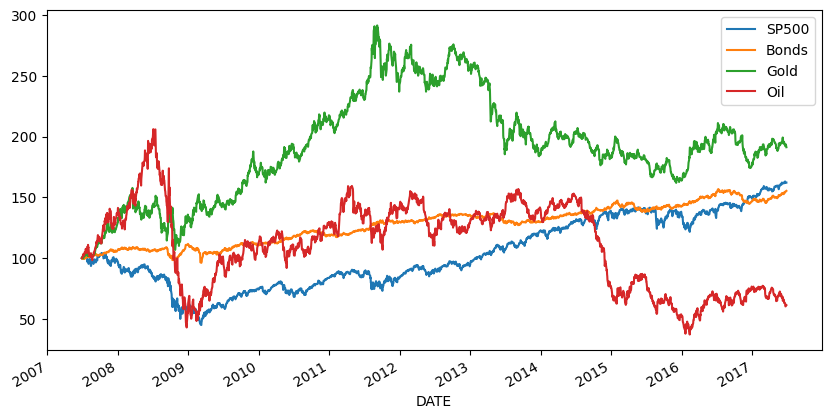

In [32]:
# Import data here
prices = pd.read_csv('data/asset_classes.csv', parse_dates = ['DATE'], index_col = 'DATE')

# Inspect prices here
print(prices)

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

print('normalized data:\n', normalized)

# Plot normalized
normalized.plot(figsize=(10,5))
plt.show()

-> Comparing stock prices with a benchmark

In [33]:
# Import stock prices and index here
stocks = pd.read_csv('data/nyse.csv', parse_dates= ['date'], index_col='date')
dow_jones = pd.read_csv('data/dow_jones.csv', parse_dates= ['date'], index_col='date')

In [34]:
stocks.head()

,JNJ,JPM,XOM
date,,,
2010-01-04,64.68,42.85,69.15
2010-01-05,63.93,43.68,69.42
2010-01-06,64.45,43.92,70.02
2010-01-07,63.99,44.79,69.80
2010-01-08,64.21,44.68,69.52


In [35]:
dow_jones.head()

,DJIA
date,
2010-01-04,10583.96
2010-01-05,10572.02
2010-01-06,10573.68
2010-01-07,10606.86
2010-01-08,10618.19


In [36]:
# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones],  axis=1)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


,JNJ,JPM,XOM,DJIA
date,,,,
2010-01-04,64.68,42.85,69.15,10583.96
2010-01-05,63.93,43.68,69.42,10572.02
2010-01-06,64.45,43.92,70.02,10573.68
2010-01-07,63.99,44.79,69.80,10606.86
2010-01-08,64.21,44.68,69.52,10618.19


In [37]:
# Normalize and plot your data here
normalize = data.div(data.iloc[0]).mul(100)
normalize.head()

,JNJ,JPM,XOM,DJIA
date,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000
2010-01-05,98.840445,101.936989,100.390456,99.887188
2010-01-06,99.644403,102.497083,101.258134,99.902872
2010-01-07,98.933210,104.527421,100.939986,100.216365
2010-01-08,99.273346,104.270712,100.535069,100.323414


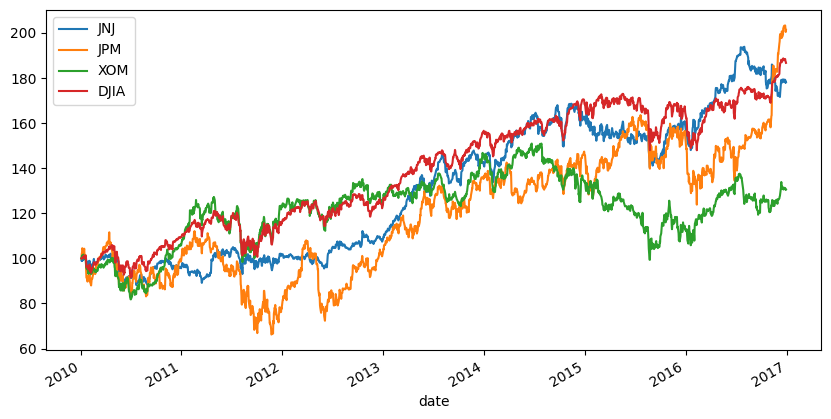

In [38]:
normalize.plot(figsize=(10,5))
plt.show()

-> Plot performance difference vs benchmark index

In [39]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('data/msft_aapl.csv', parse_dates =['date'], index_col='date')
print(stocks.head())
# Import index here
sp500 = pd.read_csv('data/sp500.csv', parse_dates =['date'], index_col='date')
print(sp500.head())

             AAPL   MSFT
date                    
2007-01-03  11.97  29.86
2007-01-04  12.24  29.81
2007-01-05  12.15  29.64
2007-01-08  12.21  29.93
2007-01-09  13.22  29.96
              SP500
date               
2007-06-29  1503.35
2007-07-02  1519.43
2007-07-03  1524.87
2007-07-05  1525.40
2007-07-06  1530.44


In [40]:
# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()
print(data.head())

             AAPL   MSFT    SP500
date                             
2007-06-29  17.43  29.47  1503.35
2007-07-02  17.32  29.74  1519.43
2007-07-03  18.17  30.02  1524.87
2007-07-05  18.96  29.99  1525.40
2007-07-06  18.90  29.97  1530.44


In [41]:
# Normalize data
normalized = data.div(data.iloc[0]).mul(100)
print(normalized.head())

                  AAPL        MSFT       SP500
date                                          
2007-06-29  100.000000  100.000000  100.000000
2007-07-02   99.368904  100.916186  101.069611
2007-07-03  104.245554  101.866305  101.431470
2007-07-05  108.777969  101.764506  101.466724
2007-07-06  108.433735  101.696641  101.801976


In [42]:
# Subtract the normalized index from the normalized stock prices, and plot the result
subtracted = normalized[tickers].sub(normalized['SP500'], axis=0)
print(subtracted.head())

                MSFT      AAPL
date                          
2007-06-29  0.000000  0.000000
2007-07-02 -0.153425 -1.700707
2007-07-03  0.434835  2.814084
2007-07-05  0.297782  7.311245
2007-07-06 -0.105335  6.631759


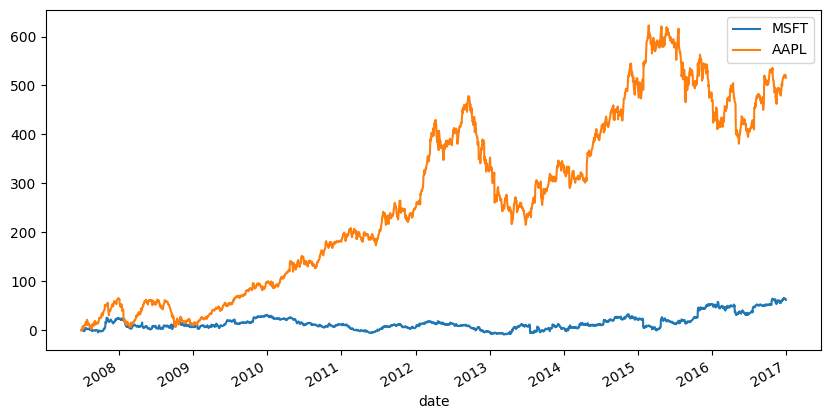

In [43]:
subtracted.plot(figsize=(10,5))
plt.show()

#### `>` Changing the time series frequency: resampling


-> Convert monthly to weekly data

In [44]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start = start, end = end, freq = 'M')

# Create and print monthly here
monthly = pd.Series(data = [1,2] , index = monthly_dates)
print(monthly)

2016-01-31    1
2016-02-29    2
Freq: ME, dtype: int64


C:\Users\alisa\AppData\Local\Temp\ipykernel_11500\3879226235.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_dates = pd.date_range(start = start, end = end, freq = 'M')


In [45]:
# Create weekly_dates here
weekly_dates = pd.date_range(start = start, end = end, freq = 'W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64


In [46]:
print(monthly.reindex(weekly_dates, method = 'bfill'))

2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64


In [47]:
print(monthly.reindex(weekly_dates, method = 'ffill'))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


-> Create weekly from monthly unemployment data

In [48]:
unrate = pd.read_csv('data/unrate.csv', parse_dates=['DATE'], index_col='DATE')
unrate.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [49]:
unrate.asfreq('W').head(5)

,UNRATE
DATE,
2010-01-03,NaN
2010-01-10,NaN
2010-01-17,NaN
2010-01-24,NaN
2010-01-31,NaN


In [50]:
unrate.asfreq('W', method = 'bfill').head(5)

,UNRATE
DATE,
2010-01-03,9.8
2010-01-10,9.8
2010-01-17,9.8
2010-01-24,9.8
2010-01-31,9.8


In [51]:
# Create weekly series with ffill option and show first five rows
weekly_ffill =  unrate.asfreq('W', method='ffill')
weekly_ffill.head(5)


,UNRATE
DATE,
2010-01-03,9.8
2010-01-10,9.8
2010-01-17,9.8
2010-01-24,9.8
2010-01-31,9.8


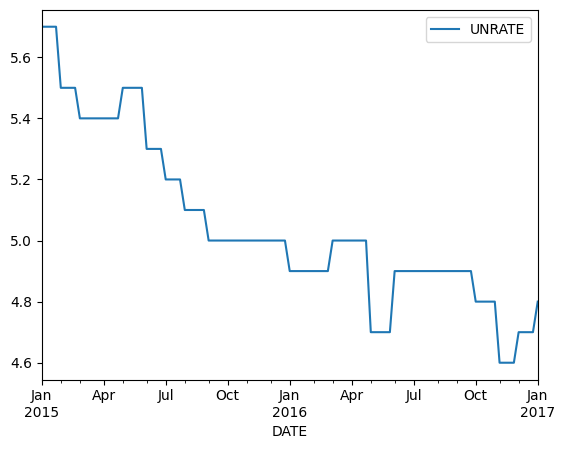

In [52]:
# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()
plt.show()


#### `>` Upsampling & interpolation with .resample()

-> Use interpolation to create weekly employment data


In [53]:
unrate

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6
...,...
2016-09-01,4.9
2016-10-01,4.8
2016-11-01,4.6


In [54]:
# Create monthly_dates using the min and max of the unemployment index for 2010-2015
monthly_dates = pd.date_range(start='2010-01-31', end='2015-12-31', freq='MS')

# Create and print monthly here
monthly = unrate.reindex(monthly_dates)
monthly.head()


,UNRATE
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6
2010-06-01,9.4


In [55]:
# Inspect data here
print(monthly.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71 entries, 2010-02-01 to 2015-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  71 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB
None


In [56]:
# Create weekly dates
weekly_dates = pd.date_range(start = monthly.index.min(), end = monthly.index.max(), freq = 'W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)
weekly.head()

,UNRATE
2010-02-07,NaN
2010-02-14,NaN
2010-02-21,NaN
2010-02-28,NaN
2010-03-07,NaN


In [57]:
# Create ffill and interpolated columns
weekly['ffill'] = weekly['UNRATE'].ffill()
weekly['interpolated'] = weekly['UNRATE'].interpolate()

In [58]:
weekly.head()

,UNRATE,ffill,interpolated
2010-02-07,NaN,NaN,NaN
2010-02-14,NaN,NaN,NaN
2010-02-21,NaN,NaN,NaN
2010-02-28,NaN,NaN,NaN
2010-03-07,NaN,NaN,NaN


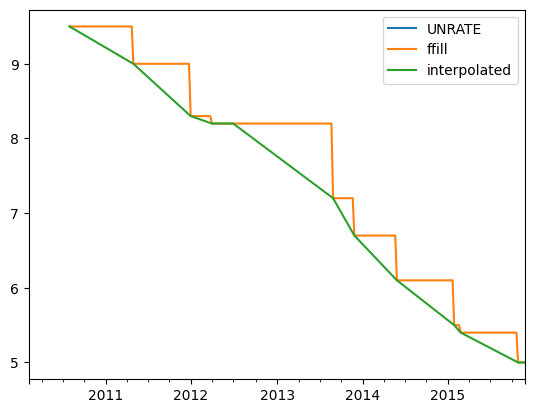

In [59]:
# Plot weekly
weekly.plot()
plt.show()


-> Interpolate debt/GDP and compare to unemployment

In [60]:
debt_unemployment = pd.read_csv('data/debt_unemployment.csv', parse_dates=['date'], index_col='date')
debt_unemployment.head()

,Debt/GDP,Unemployment
date,,
2010-01-01,87.00386,9.8
2010-02-01,NaN,9.8
2010-03-01,NaN,9.9
2010-04-01,88.67047,9.9
2010-05-01,NaN,9.6


In [61]:
# Interpolate and inspect here
interpolated = debt_unemployment.interpolate()
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB


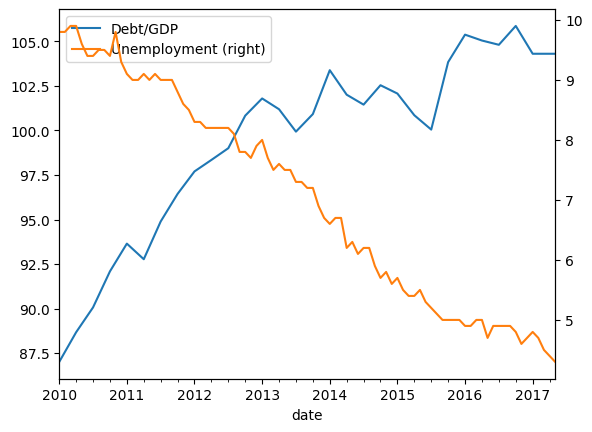

In [62]:
# Plot interpolated data here
interpolated.plot(secondary_y = 'Unemployment')
plt.show()

#### `>` Downsampling & aggregation

-> Compare weekly, monthly and annual ozone trends for NYC & LA

In [63]:
ozone_nyla = pd.read_csv('data/ozone_nyla.csv', parse_dates=['date'], index_col='date')
ozone_nyla.head()

,Los Angeles,New York
date,,
2000-01-01,0.008375,0.004032
2000-01-02,NaN,0.009486
2000-01-03,NaN,0.005580
2000-01-04,0.005500,0.008717
2000-01-05,0.005000,0.013754


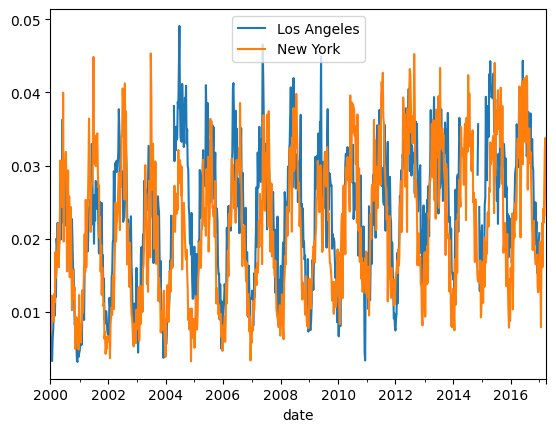

In [64]:
# Calculate and plot the weekly average ozone trend
weekly_average = ozone_nyla.resample('W').mean()
weekly_average.plot()
plt.show()


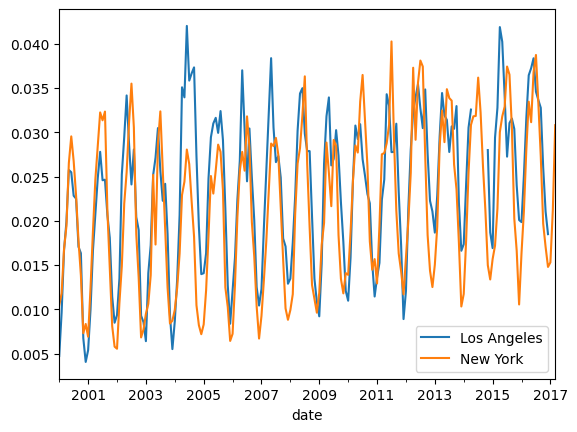

In [65]:

# Calculate and plot the monthly average ozone trend
monthly_average = ozone_nyla.resample('ME').mean()
monthly_average.plot()
plt.show()


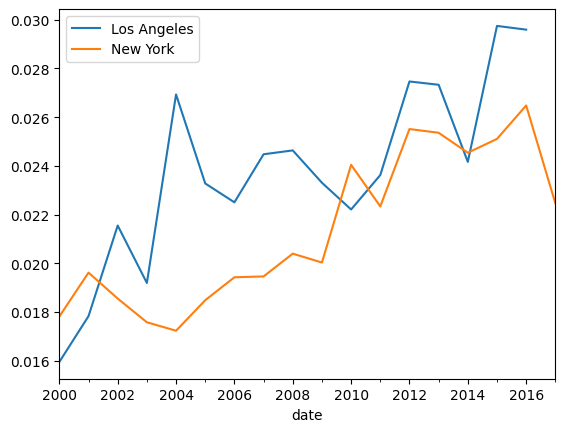

In [66]:
# Calculate and plot the annual average ozone trend
annual_average = ozone_nyla.resample('YE').mean()
annual_average.plot()
plt.show()

-> Compare monthly average stock prices for Facebook and Google

In [67]:
stocks_goog_fb = pd.read_csv('data/goog_fb.csv', parse_dates=['date'], index_col='date')
stocks_goog_fb.head()

,FB,GOOG
date,,
2015-01-02,78.45,524.81
2015-01-05,77.19,513.87
2015-01-06,76.15,501.96
2015-01-07,76.15,501.10
2015-01-08,78.18,502.68


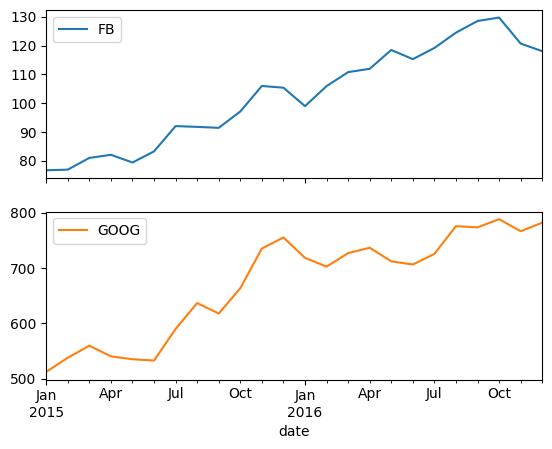

In [68]:
# Calculate and plot the monthly averages
monthly_average = stocks_goog_fb.resample('ME').mean()
monthly_average.plot(subplots=True)
plt.show()

-> Compare quarterly GDP growth rate and stock returns


In [69]:
gdp_growth = pd.read_csv('data/gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp_growth.head()

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1
2007-07-01,2.7
2007-10-01,1.4
2008-01-01,-2.7


In [70]:
djia = pd.read_csv('data/djia.csv', parse_dates=['date'], index_col='date')
djia.head()

,djia
date,
2007-06-29,13408.62
2007-07-02,13535.43
2007-07-03,13577.30
2007-07-04,NaN
2007-07-05,13565.84


In [71]:
# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly.head()

,djia
date,
2007-04-01,13408.62
2007-07-01,13535.43
2007-10-01,14087.55
2008-01-01,13043.96
2008-04-01,12654.36


In [72]:
djia_quarterly_return = djia_quarterly.pct_change().mul(100)
djia_quarterly_return.head()

,djia
date,
2007-04-01,NaN
2007-07-01,0.945735
2007-10-01,4.079072
2008-01-01,-7.407889
2008-04-01,-2.986823


In [73]:
# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis = 1)
data.head()

,gdp_growth,djia
date,,
2007-01-01,0.2,NaN
2007-04-01,3.1,NaN
2007-07-01,2.7,0.945735
2007-10-01,1.4,4.079072
2008-01-01,-2.7,-7.407889


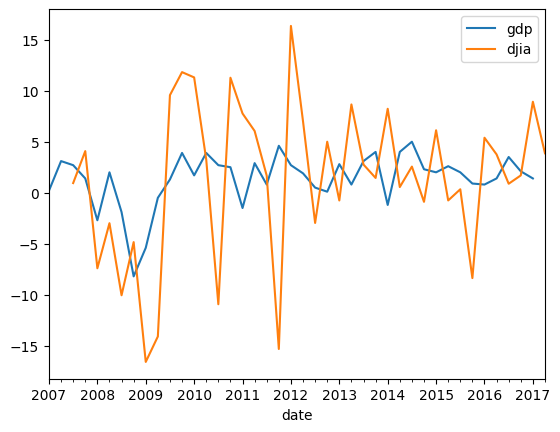

In [74]:
data.columns = ['gdp', 'djia']
data.plot()
plt.show()

-> Visualize monthly mean, median and standard deviation of S&P500 returns

In [75]:
sp500 = pd.read_csv('data/sp500.csv', parse_dates=['date'], index_col='date')
sp500.head()

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


In [76]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


In [77]:
# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()
daily_returns

date
2007-06-29         NaN
2007-07-02    0.010696
2007-07-03    0.003580
2007-07-05    0.000348
2007-07-06    0.003304
                ...   
2016-12-23    0.001252
2016-12-27    0.002248
2016-12-28   -0.008357
2016-12-29   -0.000293
2016-12-30   -0.004637
Name: SP500, Length: 2395, dtype: float64

In [78]:
daily_returns.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Series name: SP500
Non-Null Count  Dtype  
--------------  -----  
2394 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


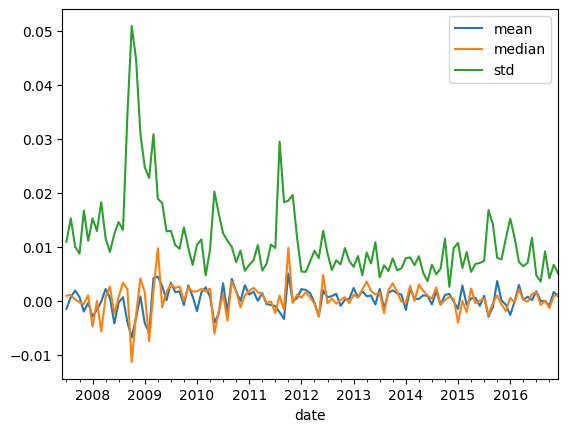

In [79]:
# Resample and calculate statistics
stats = daily_returns.resample('ME').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot()
plt.show()

-----------
### CH03: Window Functions: Rolling & Expanding Metrics

#### `>` Rolling window functions with pandas

-> Rolling average air quality since 2010 for new york city

In [80]:
ozone_nyc = pd.read_csv('data/ozone_nyc.csv', parse_dates=['date'], index_col='date')
ozone_nyc.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [81]:
# Calculate 90d and 360d rolling mean for the last price
ozone_nyc['90D'] = ozone_nyc['Ozone'].rolling(window='90D').mean()
ozone_nyc['360D'] = ozone_nyc['Ozone'].rolling(window='360D').mean()

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

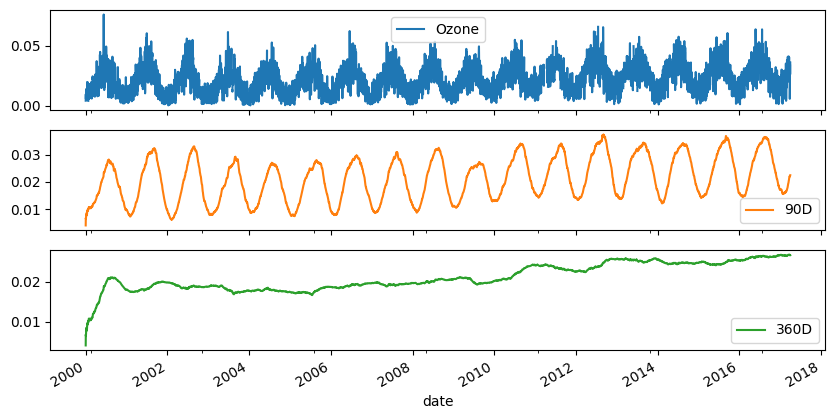

In [82]:
ozone_nyc.plot(figsize=(10, 5), subplots=True)

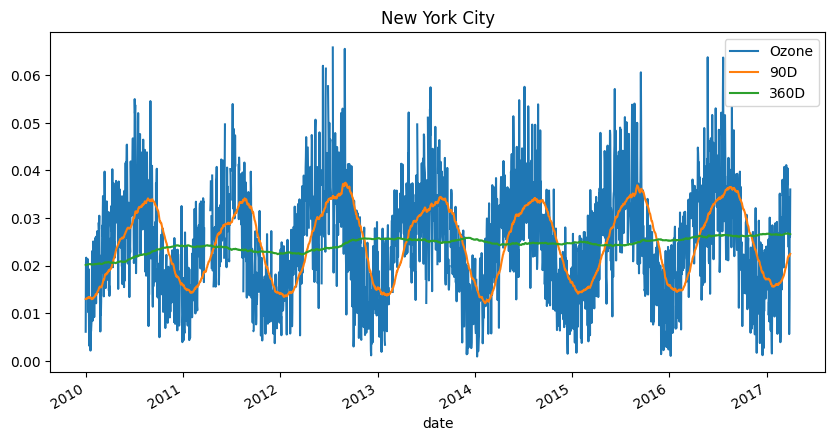

In [83]:
# Plot data
ozone_nyc.loc['2010':].plot(figsize=(10, 5))
plt.title('New York City')
plt.show()

-> Rolling 360-day median & std. deviation for nyc ozone data since 2000

In [84]:
ozone_nyc = pd.read_csv('data/ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()


In [85]:
# Calculate the rolling mean and std here
rolling_stats = ozone_nyc['Ozone'].rolling(360).agg(['mean', 'std'])
rolling_stats.head()

,mean,std
date,,
2000-01-01,NaN,NaN
2000-01-02,NaN,NaN
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN


In [86]:
# Join rolling_stats with ozone data
stats = ozone_nyc.join(rolling_stats)
stats.head()

,Ozone,mean,std
date,,,
2000-01-01,0.004032,NaN,NaN
2000-01-02,0.009486,NaN,NaN
2000-01-03,0.005580,NaN,NaN
2000-01-04,0.008717,NaN,NaN
2000-01-05,0.013754,NaN,NaN


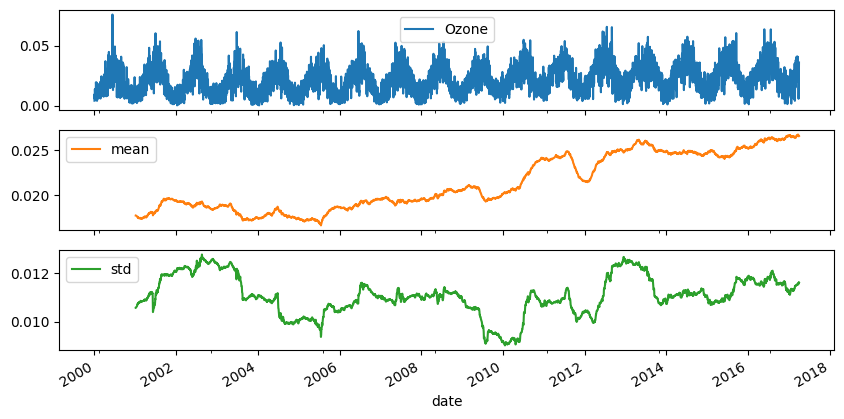

In [87]:
# Plot stats
stats.plot(subplots=True, figsize=(10, 5))
plt.show()

-> Rolling quantiles for daily air quality in nyc


In [88]:
ozone_nyc = pd.read_csv('data/ozone_nyc.csv', parse_dates=['date'], index_col='date')
# Resample, interpolate and inspect ozone data here
data = ozone_nyc.resample('D').interpolate()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


In [89]:
# Create the rolling window
rolling = data['Ozone'].rolling(360)

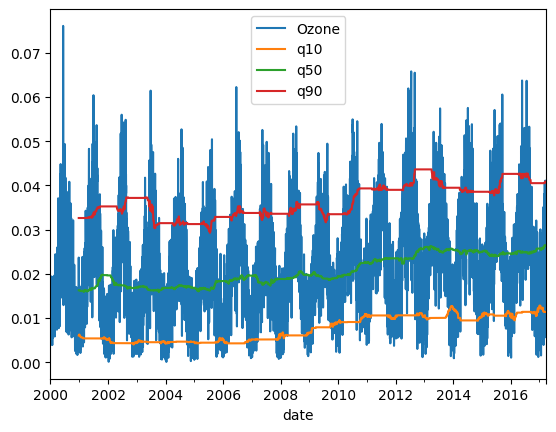

In [90]:
# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

# Plot the data
data.plot()
plt.show()

#### `>` Expanding window functions with pandas

-> Cumulative sum vs .diff()

In [91]:
google_stock = pd.read_csv('data/google.csv', parse_dates=['Date'], index_col='Date')
google_stock.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [92]:
# Calculate differences
differences = google_stock.diff().dropna()
differences

,Close
Date,
2014-01-03,-4.05
2014-01-07,10.76
2014-01-08,1.18
2014-01-09,-5.49
2014-01-10,-0.03
...,...
2016-12-22,-3.30
2016-12-23,-1.35
2016-12-28,-6.50


In [93]:
# Select start price
start_price = google_stock.first('D')
start_price

C:\Users\alisa\AppData\Local\Temp\ipykernel_11500\2976780852.py:2: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  start_price = google_stock.first('D')


,Close
Date,
2014-01-02,556.0


In [94]:
# Calculate cumulative sum
cumulative_sum = pd.concat([start_price, differences]).cumsum()
cumulative_sum

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-07,562.71
2014-01-08,563.89
2014-01-09,558.40
...,...
2016-12-22,740.39
2016-12-23,739.04
2016-12-28,732.54


In [95]:
# Validate cumulative sum equals data
google_stock.equals(cumulative_sum)

False

##### -> Cumulative return on $1,000 invested in google vs apple I
compare how much $1,000 would be worth if invested in Google ('GOOG') or Apple ('AAPL') in 2010.

In [96]:
apple_google = pd.read_csv('data/apple_google.csv', parse_dates=['Date'], index_col='Date')
apple_google.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,313.06
2010-01-05,NaN,311.68
2010-01-06,NaN,303.83
2010-01-07,NaN,296.75
2010-01-08,NaN,300.71


Apple: $3328.83 (232.88%)
Google: $3082.03 (208.20%)


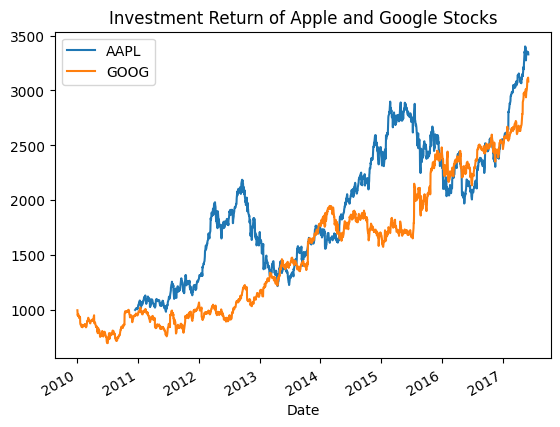

In [97]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = apple_google.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns + 1
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return_investment = cumulative_return.mul(investment)
final_apple = cumulative_return_investment['AAPL'].iloc[-1]
final_google = cumulative_return_investment['GOOG'].iloc[-1]

apple_return_pct = ((final_apple / investment) - 1) * 100
google_return_pct = ((final_google / investment) - 1) * 100

print(f"Apple: ${final_apple:.2f} ({apple_return_pct:.2f}%)")
print(f"Google: ${final_google:.2f} ({google_return_pct:.2f}%)")


cumulative_return_investment.plot()
plt.title('Investment Return of Apple and Google Stocks')
plt.show()


-> Cumulative return on $1,000 invested in google vs apple II

Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

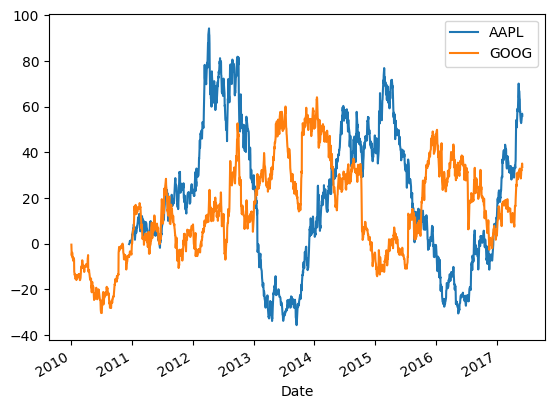

In [98]:
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = apple_google.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling(window = '360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()

#### `>` Case study: S&P500 price simulation

In [99]:
from numpy.random import normal, seed, choice
from scipy.stats import norm
import seaborn as sns

-> Random walk I

build your own random walk by drawing random numbers from the normal distribution with the help of numpy

In [100]:
seed(42)  # For reproducibility

In [101]:
# Create random_walk
random_walk = normal(loc=.001, scale=.01, size = 2500)
random_walk

array([ 0.00596714, -0.00038264,  0.00747689, ..., -0.0017976 ,
        0.00890372,  0.00440051])

In [102]:
# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)
random_walk.head()

0    0.005967
1   -0.000383
2    0.007477
3    0.016230
4   -0.001342
dtype: float64

In [103]:
# Create random_prices
random_prices = random_walk.add(1).cumprod()
random_prices.head()

0    1.005967
1    1.005582
2    1.013101
3    1.029544
4    1.028163
dtype: float64

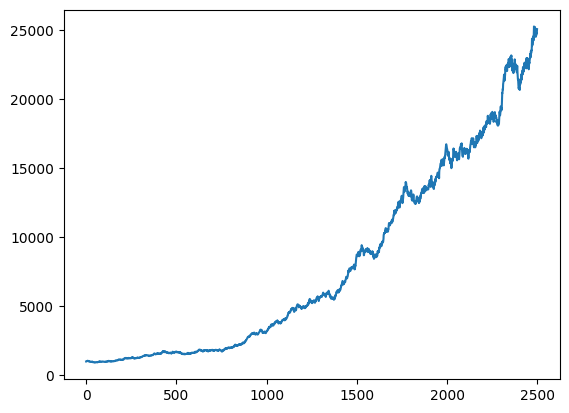

In [104]:
# Plot random_prices here
random_prices.mul(1000).plot()
plt.show()

-> Random walk II

build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. 

In [105]:
fb = pd.read_csv('data/fb.csv' , parse_dates=['date'], index_col='date')
fb.head()

,price
date,
2012-05-17,38.00
2012-05-18,38.23
2012-05-21,34.03
2012-05-22,31.00
2012-05-23,32.00


<Axes: ylabel='Count'>

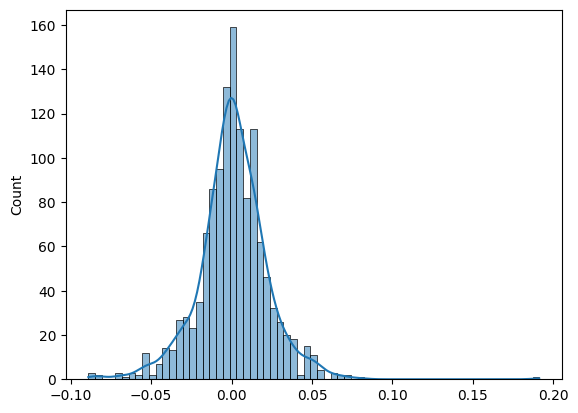

In [106]:
# Calculate daily_returns here
daily_returns = fb['price'].pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk, index=fb.index[1:])

# Plot random_walk distribution
sns.histplot(random_walk, kde=True)

-> Random walk III

complete your random walk simulation using Facebook stock returns over the last five years. 

In [107]:
# Select fb start price here
start = fb['price'].loc[fb.index[0]]
start_series = pd.Series([start], index=[fb.index[0]])

# Add 1 to random walk and concatenate with start
random_walk = random_walk.add(1)
random_price = pd.concat([start_series, random_walk])

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price
fb.head()


,price,random
date,,
2012-05-17,38.00,38.000000
2012-05-18,38.23,37.533527
2012-05-21,34.03,38.094177
2012-05-22,31.00,38.773788
2012-05-23,32.00,38.923965


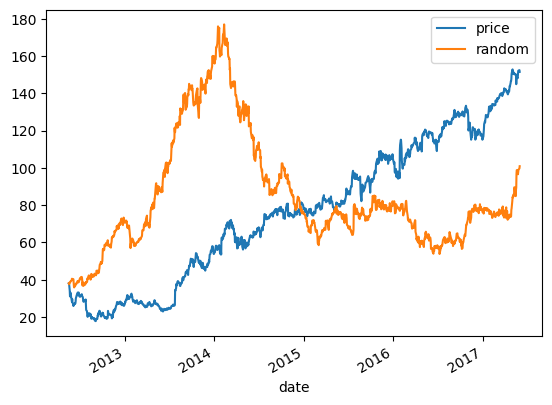

In [108]:
fb.plot()
plt.show()

#### `>` Relationships between time series: correlation

-> Annual return correlations among several stocks

for apple (AAPL), Amazon (AMZN), IBM (IBM), WalMart (WMT), and Exxon Mobile (XOM) calculate the year-end returns, the pairwise correlations among all stocks, and visualize the result as an annotated heatmap.

In [109]:
stocks = pd.read_csv('data/5_stocks.csv', parse_dates=['Date'], index_col='Date')
stocks.head()

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-07-05,1.66,15.27,NaN,NaN,NaN
2001-07-06,1.57,15.27,106.50,47.34,43.40
2001-07-09,1.62,15.81,104.72,48.25,43.36
2001-07-10,1.51,15.61,101.96,47.50,42.88
2001-07-11,1.61,15.34,103.85,48.85,42.48


          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


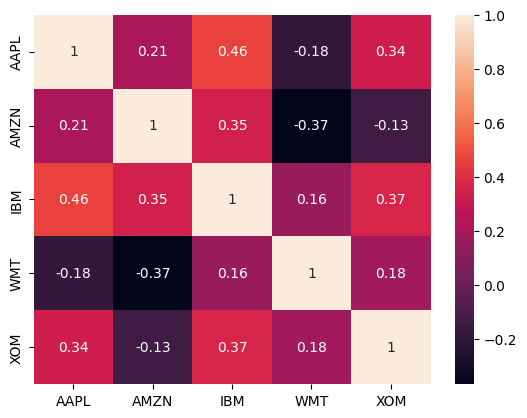

In [110]:
# Calculate year-end prices here
annual_prices = stocks.resample('YE').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()


------------
### ch04: Putting it all together: Building a value-weighted index

-> Explore and clean company listing information

In [111]:
listings = pd.read_excel('data/listings.xlsx', sheet_name='nyse',na_values='n/a')
listings.head()

d:\ITI\DataCamp\.venv2\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing"
4,AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines


In [112]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


In [113]:
# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace = True)

In [114]:
# Drop rows with missing 'sector' data
listings.dropna(subset = ['Sector'], inplace = True)

In [115]:
listings = listings[listings['IPO Year'] < 2019]

In [116]:
listings.groupby('Sector').size().sort_values(ascending = False)

Sector
Consumer Services        240
Finance                  132
Energy                   113
Technology               108
Public Utilities          76
Basic Industries          66
Capital Goods             61
Consumer Non-Durables     47
Health Care               43
Transportation            37
Miscellaneous             25
Consumer Durables         19
dtype: int64

-> Select and inspect index components

In [117]:
# Select largest company for each sector
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)
components.sort_values(ascending=False)

Sector                 Stock Symbol
Miscellaneous          BABA            2.755250e+11
Technology             ORCL            1.810461e+11
Health Care            ABBV            1.021961e+11
Transportation         UPS             9.018089e+10
Finance                GS              8.884059e+10
Consumer Non-Durables  ABEV            8.824020e+10
Basic Industries       RIO             7.043148e+10
Public Utilities       TEF             5.460981e+10
Capital Goods          GM              5.008634e+10
Consumer Services      LVS             4.438430e+10
Energy                 PAA             2.222300e+10
Consumer Durables      WRK             1.235490e+10
Name: Market Capitalization, dtype: float64

In [118]:
# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

Index(['RIO', 'GM', 'WRK', 'ABEV', 'LVS', 'PAA', 'GS', 'ABBV', 'BABA', 'TEF',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')


In [119]:
# Print company name, market cap, and last price for each component 
info_cols = ['Company Name','Market Capitalization', 'Last Sale' ]
listings.loc[tickers, info_cols].sort_values(by='Market Capitalization', ascending=False)

,Company Name,Market Capitalization,Last Sale
Stock Symbol,,,
BABA,Alibaba Group Holding Limited,2.755250e+11,110.21
ORCL,Oracle Corporation,1.810461e+11,44.00
ABBV,AbbVie Inc.,1.021961e+11,64.13
UPS,"United Parcel Service, Inc.",9.018089e+10,103.74
GS,"Goldman Sachs Group, Inc. (The)",8.884059e+10,223.32
ABEV,Ambev S.A.,8.824020e+10,5.62
RIO,Rio Tinto Plc,7.043148e+10,38.94
TEF,Telefonica SA,5.460981e+10,10.84
GM,General Motors Company,5.008634e+10,33.39


-> Import index component price information

In [120]:
stock_prices = pd.read_csv('data/stock_data.csv', parse_dates=['Date'], index_col='Date')
stock_prices.head()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17


In [121]:
# Calculate the returns
price_return = ((stock_prices.iloc[-1]/stock_prices.iloc[0])-1).mul(100)
# Print the returns
print(price_return)

AAPL    278.868171
AMGN    153.309078
AMZN    460.022405
CPRT    204.395604
EL      215.162752
GS       38.346429
ILMN    319.116203
MA      302.063863
PAA      19.592593
RIO     -31.358201
TEF     -67.775832
UPS      97.043658
dtype: float64


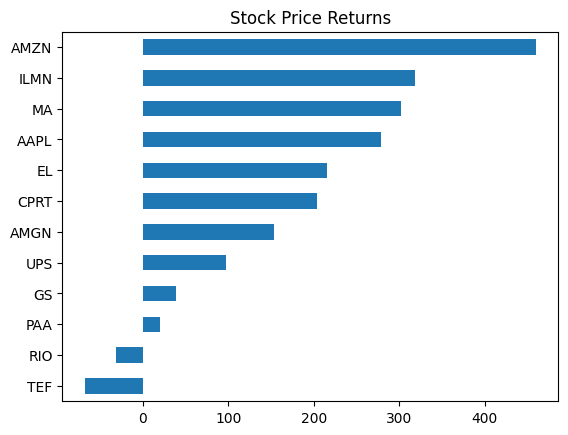

In [122]:
# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh')
plt.title('Stock Price Returns')
plt.show()

-> Calculate number of shares outstanding

In [131]:
# Select components and relevant columns from listings
components = listings.loc[tickers, ['Market Capitalization','Last Sale']]
components.head()

,Market Capitalization,Last Sale
Stock Symbol,,
RIO,7.043148e+10,38.94
GM,5.008634e+10,33.39
WRK,1.235490e+10,49.34
ABEV,8.824020e+10,5.62
LVS,4.438430e+10,55.90


In [133]:
# Calculate the number of shares here
no_shares = components['Market Capitalization'] / components['Last Sale']

# Print the sorted no_shares
print(no_shares.sort_values(ascending = False))

Stock Symbol
ABEV    1.570110e+10
TEF     5.037805e+09
ORCL    4.114684e+09
BABA    2.500000e+09
RIO     1.808718e+09
ABBV    1.593577e+09
GM      1.500040e+09
UPS     8.692972e+08
LVS     7.939946e+08
PAA     7.234050e+08
GS      3.978174e+08
WRK     2.504034e+08
dtype: float64


-> Create time series of market value

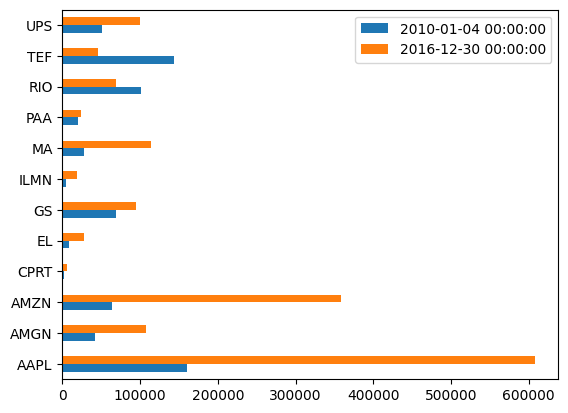

In [138]:
components = pd.read_csv('data/components.csv', index_col='Stock Symbol')

# Select the number of shares
no_shares = components.loc[:, 'Number of Shares'].sort_values()

# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]


# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis = 1).plot(kind = 'barh')
plt.show()

-> Calculate & plot the composite index

In [139]:
market_cap_series = pd.read_csv('data/market_cap_series.csv', parse_dates=['Date'], index_col='Date')

In [140]:
# Aggregate and print the market cap per trading day
raw_index = market_cap_series.sum(axis=1)
raw_index

Date
2010-01-04    6.948176e+05
2010-01-05    6.979957e+05
2010-01-06    6.946857e+05
2010-01-07    6.912416e+05
2010-01-08    6.958476e+05
                  ...     
2016-12-23    1.588874e+06
2016-12-27    1.599280e+06
2016-12-28    1.593635e+06
2016-12-29    1.589422e+06
2016-12-30    1.574862e+06
Length: 1762, dtype: float64

In [143]:
# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
index

Date
2010-01-04    100.000000
2010-01-05    100.457394
2010-01-06     99.981005
2010-01-07     99.485328
2010-01-08    100.148231
                 ...    
2016-12-23    228.675001
2016-12-27    230.172669
2016-12-28    229.360223
2016-12-29    228.753821
2016-12-30    226.658267
Length: 1762, dtype: float64

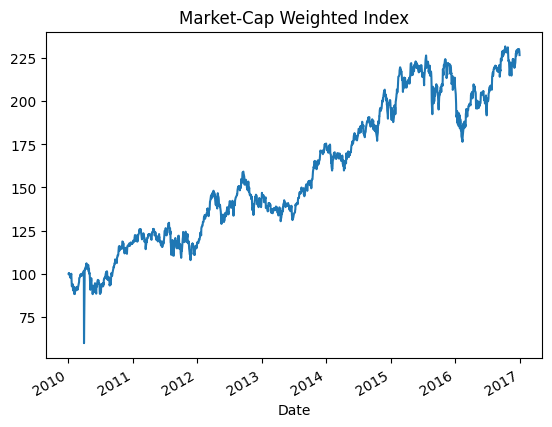

In [144]:
# Plot the index here
index.plot()
plt.title('Market-Cap Weighted Index')
plt.show()

-> Calculate the contribution of each stock to the index

In [148]:
# Calculate and print the index return here
index_return = ((index.iloc[-1] / index.iloc[0]) - 1 ) * 100
print(index_return)

126.65826661173818


Stock Symbol
CPRT    0.007564
PAA     0.012340
ILMN    0.014110
EL      0.017282
TEF     0.030324
RIO     0.039110
GS      0.049332
UPS     0.050077
AMGN    0.066039
MA      0.068484
AMZN    0.234410
AAPL    0.410929
Name: Market Capitalization, dtype: float64


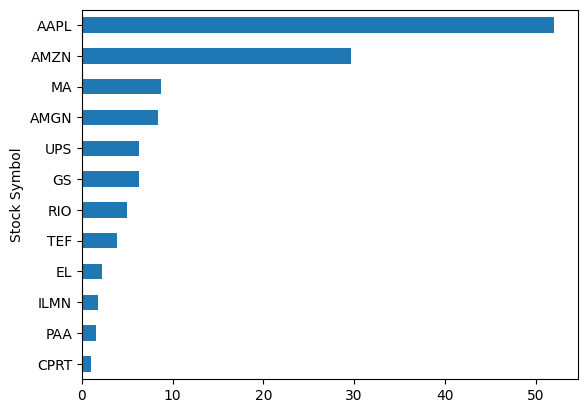

In [150]:
# Select the market capitalization
market_cap = components.loc[:, 'Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind = 'barh')
plt.show()


-> Compare index performance against benchmark I

In [182]:
djia = pd.read_csv('data/djia.csv', parse_dates=['date'], index_col='date')
index = pd.read_csv('data/index.csv', parse_dates=['Date'], index_col='Date')

C:\Users\alisa\AppData\Local\Temp\ipykernel_11500\3495534334.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  index = pd.read_csv('data/index.csv', parse_dates=['Date'], index_col='Date')


In [183]:
data = index.rename(columns={index.columns[0]: 'Index'})
data.head()

,Index
Date,
2010-01-04,100.000000
2010-01-05,100.457394
2010-01-06,99.981005
2010-01-07,99.485328
2010-01-08,100.148231


Index    126.658267
DJIA      86.722172
dtype: float64


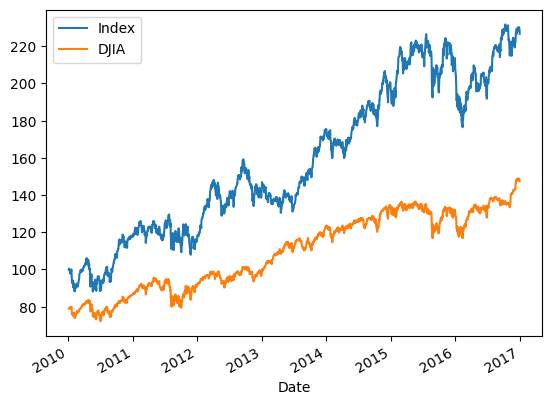

In [185]:
# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print(((data.iloc[-1] / data.iloc[0]) - 1 ) * 100)

# Plot both series
data.plot()
plt.show()

-> Compare index performance against benchmark II

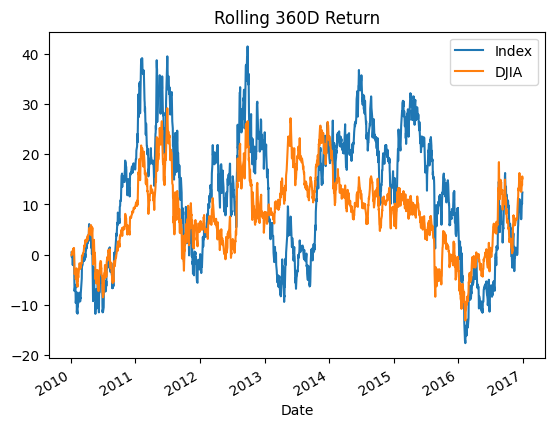

In [186]:
# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r+1) - 1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title = 'Rolling 360D Return')
plt.show()

-> Visualize your index constituent correlations


C:\Users\alisa\AppData\Local\Temp\ipykernel_11500\668309485.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = stock_prices.pct_change()


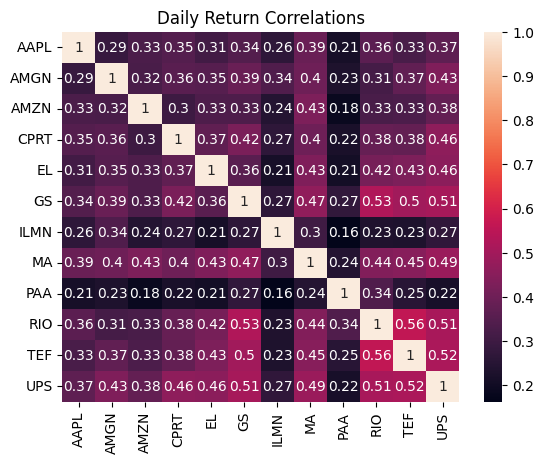

In [191]:
stock_prices = pd.read_csv('data/stock_data.csv', parse_dates=['Date'], index_col='Date')

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title( 'Daily Return Correlations')
plt.show()

In [ ]:
# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())

# Create index & stock price returns
returns = data.pct_change()

# Export data and data as returns to excel
with pd.ExcelWriter('data.xls') as writer:
    data.to_excel(writer, sheet_name='data')
    returns.to_excel(writer, sheet_name='returns')

------------
<h3 style="text-align: center;"> Thank you (^​_^）</h3>

GitHub: [3lis0](https://github.com/3lis0)
LinkedIn: [ali-salama](https://www.linkedin.com/in/ali-salama/)